# Importazione Librerie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# stile dei grafici
sns.set(style="whitegrid")
sns.set_context("talk")

# Regressione Lineare

In [ ]:
class RegressioneLineare :

  def __init__(self, learning_rate = 0.01, max_iter = 1000):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
    self.weight = np.random.randn()
    self.bias = np.random.randn()


  def fit(self, X, y):

    for _ in range(self.max_iter):

      # predizioni (variante batch : su tutto il dataset X)
      y_pred = self.weight * X + self.bias

      # calcoliamo i gradienti per w e b
      db = np.mean(y_pred - y)   # mean : errore medio
      dw = np.mean((y_pred - y) * X)

      # aggiornamento dei paranetri rispetto all'errore
      self.weight = self.weight - self.learning_rate * dw
      self.bias = self.bias - self.learning_rate * db


    print("w : ", self.weight)
    print("b : ", self.bias)


  def predict(self, X):
    return self.weight * X + self.bias


  def get_weight(self):
    return self.weight

  def get_bias(self):
    return self.bias

  def get_params(self, deep=True):
    return {"learning_rate": self.learning_rate, "max_iter": self.max_iter}

Esempio con dati generati

w :  2.7998114172192703
b :  4.181460978025091


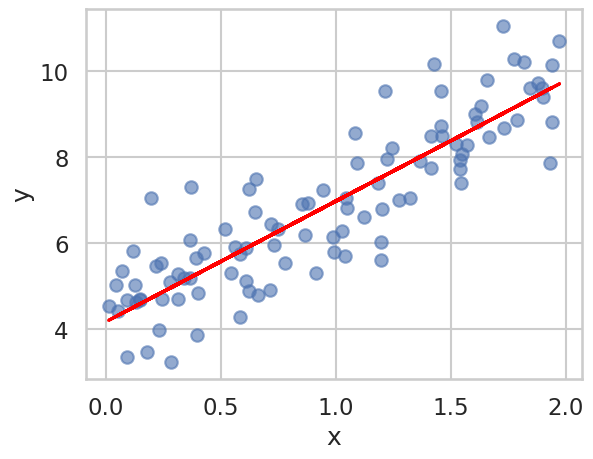

In [ ]:
np.random.seed(42)  # seed per la generazioni casuali, assegnado un seed viene assicurata una riproducibilità in futuri esperimenti

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # ground truth : y = 3X + 4 + ϵ (noise)

reg = RegressioneLineare(learning_rate=0.01, max_iter = 1000)

reg.fit(X, y)

# osserviamo che i risultati sono coerenti con la generazione :
# ground truth w = 3, b = 4
# iperparametri ottimizzati w = 2.799 , b = 4.181

# plottiami i data points
plt.scatter(X, y, alpha=0.6)

# plottiamo la retta di regressione stimata
y_pred = reg.get_bias() + reg.get_weight() * X
plt.plot(X, y_pred, color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

# Regressione Lineare Multivariata

Iteration 0: Cost = 327.0749666784974
Iteration 50: Cost = 108.4846974621461
Iteration 100: Cost = 47.023792006075766
Iteration 150: Cost = 25.193417045743285
Iteration 200: Cost = 17.162292535601424
Iteration 250: Cost = 14.09951611901316
Iteration 300: Cost = 12.873786905151707
Iteration 350: Cost = 12.34621877045817
Iteration 400: Cost = 12.093621931627702
Iteration 450: Cost = 11.955247372364813
Iteration 500: Cost = 11.86829592957246
Iteration 550: Cost = 11.807202390001038
Iteration 600: Cost = 11.760887351886307
Iteration 650: Cost = 11.724098606281721
Iteration 700: Cost = 11.694049101164659
Iteration 750: Cost = 11.669074105874369
Iteration 800: Cost = 11.648071880764455
Iteration 850: Cost = 11.630255974378299
Iteration 900: Cost = 11.615036024542666
Iteration 950: Cost = 11.601954400509968
Iteration 1000: Cost = 11.590648917260703
Iteration 1050: Cost = 11.580828853518106
Iteration 1100: Cost = 11.572258440714528
Iteration 1150: Cost = 11.56474493821761
Iteration 1200: Cost 

'X_test_single = X_test[:, 0].reshape(-1, 1)  # Ora ha forma (13,1)\ny_test_single = y_test[0]  # Valore target corrispondente\n\nX_test_single = X_test_single.T\ny_test_single = y_test_single.T\n\ny_pred_single = reg.predict(X_test_single)\nprint("Predizione:", y_pred_single)\nprint("Valore reale:", y_test_single)\n\nplt.scatter(X_test_single, y_test_single, color=\'blue\', label="Valore Reale")\nplt.scatter(X_test_single, y_pred_single, color=\'red\', label="Predizione", marker="x")\n\nplt.xlabel("X")\nplt.ylabel("y")\nplt.legend()\nplt.title("Predizione su un singolo esempio")\nplt.grid()\nplt.show()\n'

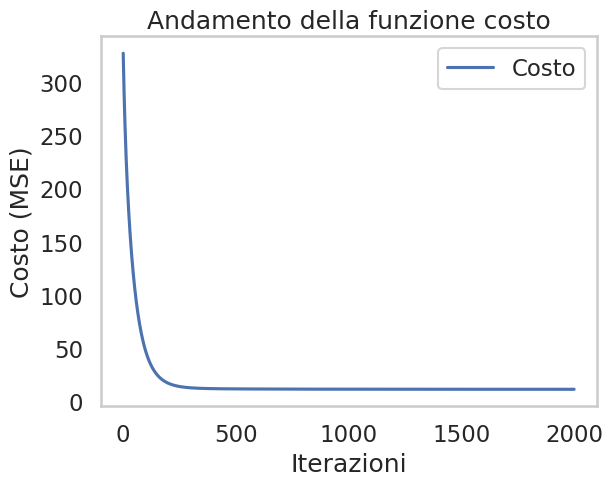

In [9]:
class RegressioneLineareMultivariata:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        self.cost_list = None

    def cost_function(self, z, y):
        m = y.shape[1]  # Assumiamo y di forma (1, m)
        J = (1/(2*m)) * np.sum(np.square(z - y))
        return J

    def fit(self, X, y):
        n_features = X.shape[0]
        m = X.shape[1]

        self.weights = np.random.rand(1, n_features)
        self.bias = 0

        self.cost_list = []

        for i in range(self.max_iter):
            z = np.dot(self.weights, X) + self.bias  # z ha forma (1, m)

            cost = self.cost_function(z, y)
            self.cost_list.append(cost)

            dz = (1/m) * (z - y)  # dz ha forma (1, m)
            dw = np.dot(dz, X.T)  # dw ha forma (1, n_features)
            db = np.sum(dz)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 50 == 0:
                print(f"Iteration {i}: Cost = {cost}")

    def predict(self, X_test):
        return np.dot(self.weights, X_test) + self.bias


# Caricamento dataset
boston = pd.read_csv("/boston.csv")

# Separare target (y) e features (X)
y = boston["MEDV"].values.reshape(-1, 1)  # Reshape per garantire forma (m, 1)
X = boston.drop(columns=["MEDV"]).values  # X mantiene forma (m, n_features)

# Normalizzazione
scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)

#scaler_y = StandardScaler()
#y_normalized = scaler_y.fit_transform(y).T  # Trasposizione per ottenere (1, m)

# Divisione train-test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.33, random_state=42)

# Trasponi X_train e y_train per compatibilità con il modello
X_train = X_train.T
y_train = y_train.T

# Allenamento del modello
reg = RegressioneLineareMultivariata(learning_rate=0.01, max_iter=2000)
reg.fit(X_train, y_train)


# Plot della funzione costo
plt.plot(range(len(reg.cost_list)), reg.cost_list, label="Costo")
plt.xlabel("Iterazioni")
plt.ylabel("Costo (MSE)")
plt.title("Andamento della funzione costo")
plt.legend()
plt.grid()

"""
X_test_single = X_test[:, 0].reshape(-1, 1)  # Ora ha forma (13,1)
y_test_single = y_test[0]  # Valore target corrispondente

X_test_single = X_test_single.T
y_test_single = y_test_single.T

y_pred_single = reg.predict(X_test_single)
print("Predizione:", y_pred_single)
print("Valore reale:", y_test_single)

plt.scatter(X_test_single, y_test_single, color='blue', label="Valore Reale")
plt.scatter(X_test_single, y_pred_single, color='red', label="Predizione", marker="x")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Predizione su un singolo esempio")
plt.grid()
plt.show()
"""

# Bias-variance trade-off

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression # la regressione lineare include quella multipla, dipende dall'input
from sklearn.pipeline import make_pipeline

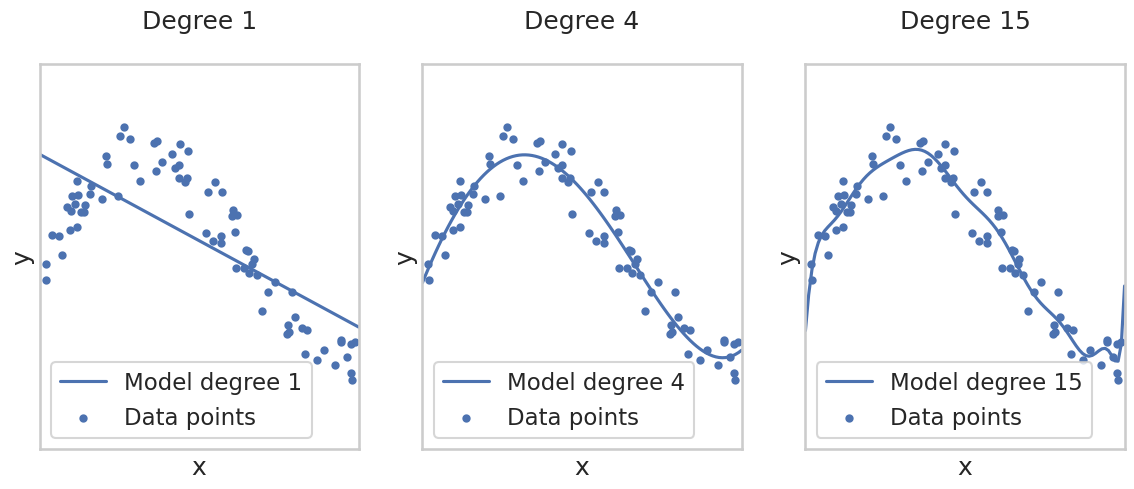

In [11]:
# generiamo dati sintetici
np.random.seed(0)

X = np.sort(np.random.rand(80, 1) * 5, axis=0)  # 80 punti campionati casualmente, ordinati, nell'intervallo [0, 5]
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # funzione sinusoidale con rumore gaussiano aggiunto

# gradi dei polinomi per i diversi modelli,  per dimostrare l'underfitting, buon fit, e overfitting
degrees = [1, 4, 15]

# dimensione del plot
plt.figure(figsize=(14, 5))

# per ogni grado scelto creiamo il modello
for i, degree in enumerate(degrees):

    # creazione subplot per ogni modello
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()

    # pipeline : espansione polinomiale di grado degreee -> addestramento

    pipeline = make_pipeline(polynomial_features, linear_regression)
    pipeline.fit(X, y)

    # creaiamo 100 punti di test equidistanti nell'intervallo [0, 5], e con newaxis poi vengono trasformati in un array bidimensionale
    X_test = np.linspace(0, 5, 100)[:, np.newaxis]

    # effettuaiamo le predizioni
    y_pred = pipeline.predict(X_test)

    # plottiamo i risultati

    # tracciamo la curva risultante dalla previsione
    plt.plot(X_test, y_pred, label="Model degree {}".format(degree))

    # plottiamo i data points
    plt.scatter(X, y, edgecolor='b', s=20, label="Data points")

    # etichette
    plt.xlabel("x")
    plt.ylabel("y")

    # limiti degli assi
    plt.xlim((0, 5))
    plt.ylim((-2, 2))

    plt.legend(loc="best")
    plt.title("Degree {}\n".format(degree))

plt.show()

## Try this
* Use L2 regularization to mitigate overfitting.

## Regolarizzazione L2 (Ridge Regression)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.93837e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


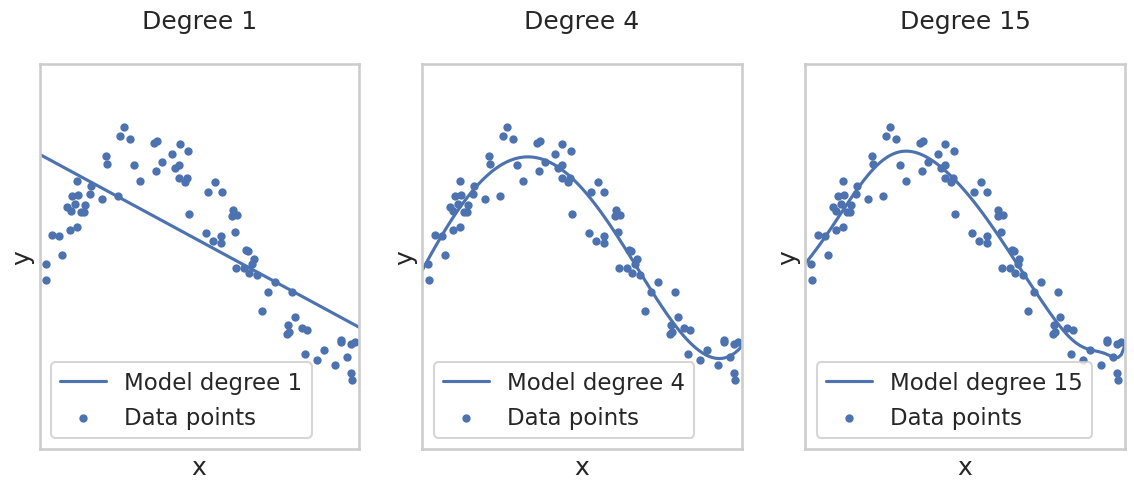

In [12]:

from sklearn.linear_model import Ridge

np.random.seed(0)
X = np.sort(np.random.rand(80, 1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])


degrees = [1, 4, 15]


alpha = 0.1  # Parametro di regolarizzazione

plt.figure(figsize=(14, 5))

for i, degree in enumerate(degrees):

    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

    # anzichè la LinearRegression usiamo la RidgeRegressione con Regolarizzazione L2 con α=0.1
    ridge_regression = Ridge(alpha=alpha)

    pipeline = make_pipeline(polynomial_features, ridge_regression)
    pipeline.fit(X, y)

    X_test = np.linspace(0, 5, 100)[:, np.newaxis]
    y_pred = pipeline.predict(X_test)

    # Plot dei risultati
    plt.plot(X_test, y_pred, label="Model degree {}".format(degree))

    plt.scatter(X, y, edgecolor='b', s=20, label="Data points")

    plt.xlabel("x")
    plt.ylabel("y")

    plt.xlim((0, 5))
    plt.ylim((-2, 2))

    plt.legend(loc="best")
    plt.title("Degree {}\n".format(degree))

plt.show()


# Classificazione

# Try this
* Implement logistic regression from scratch.
* Implement softmax regression from scratch (only the brave).

# Logistic Regression

In [14]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))

class LogisticRegression():

  def __init__(self, lr=0.01, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_sample, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):

      linear_pred = np.dot(X, self.weights) + self.bias
      y_pred = sigmoid(linear_pred)

      # dw = np.mean((y_pred - y) * X)
      # db = np.mean(y_pred - y)

      dw = (1/n_sample) * np.dot(X.T, (y_pred-y))
      db = (1/n_sample) * np.sum(y_pred-y)

      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db

  def predict(self, X):
    linear_pred = np.dot(X, self.weights) + self.bias
    y_pred = sigmoid(linear_pred)
    class_pred = [0 if y<=0.5 else 1 for y in y_pred]
    return class_pred

  def get_weights(self):
    return self.weights

  def get_bias(self):
    return self.bias

Accuracy: 0.9600


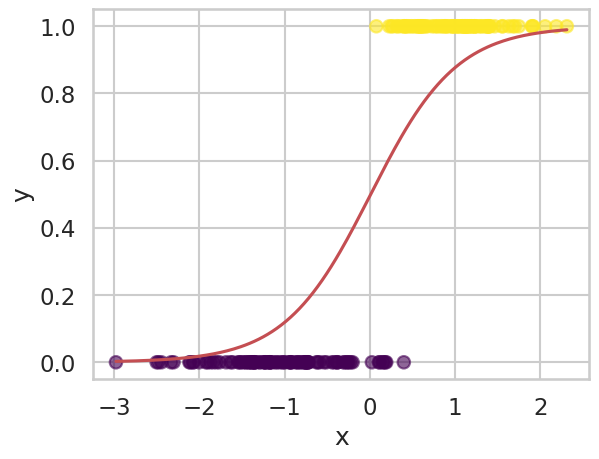

In [17]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=200, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

lg = LogisticRegression()
lg.fit(X,y)

# Predizione sui dati
y_pred = lg.predict(X)

# Calcolo dell'accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")


plt.scatter(X, y, marker='o', c=y, cmap='viridis', alpha=0.6)

plt.xlabel('x')
plt.ylabel('y')


x_boundary = np.linspace(min(X), max(X), 200)
y_boundary = sigmoid(lg.get_weights() * x_boundary + lg.get_bias())
plt.plot(x_boundary, y_boundary, 'r-', label="Decision Boundary")


plt.grid(True)
plt.show()

# Logistic Regression (tutorial)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [ ]:
class LogisticRegression:

    def __init__(self, learning_rate=0.1, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter


    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.bias = 0
        self.weights = np.zeros(n_features)


        for _ in range(self.max_iter):

            # predizione
            y_pred_linear = X @ self.weights + self.bias
            y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_linear))

            # calcolo dei gradienti
            db = 1 / n_samples * np.sum(y_pred_sigmoid - y)
            dw = 1 / n_samples * np.dot(X.T,(y_pred_sigmoid - y))

            # aggiornamento dei parametri
            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw


    def predict(self, X_test):
        y_pred_linear = X_test @ self.weights + self.bias
        y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_linear))
        classes = np.array([0 if pred < 0.5 else 1 for pred in y_pred_sigmoid])

        return classes

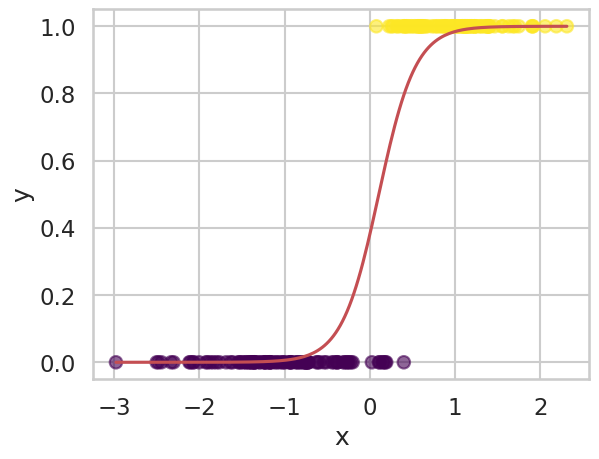

In [ ]:
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=200, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

lg = LogisticRegression()
lg.fit(X,y)


plt.scatter(X, y, marker='o', c=y, cmap='viridis', alpha=0.6)

plt.xlabel('x')
plt.ylabel('y')


x_boundary = np.linspace(min(X), max(X), 200)
y_boundary = 1 / (1 + np.exp(-(lg.weights * x_boundary + lg.bias)))
plt.plot(x_boundary, y_boundary, 'r-', label="Decision Boundary")


plt.grid(True)
plt.show()




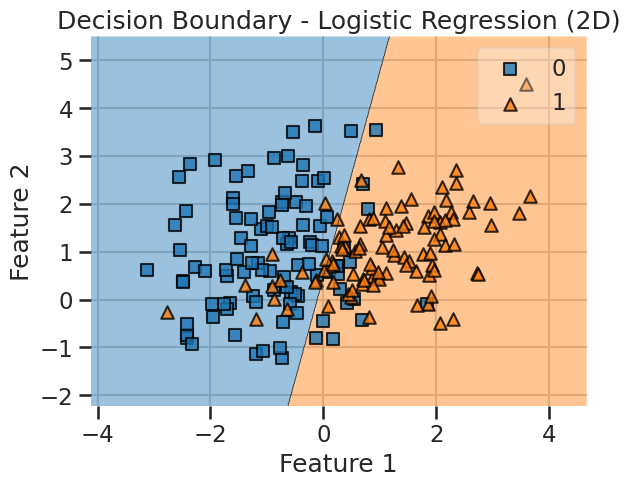

In [ ]:
# Funzione per plottare la decision boundary con più feature
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train.values[:, feature_indexes]

    # Fit del modello solo sulle feature selezionate
    clf.fit(X_train_feature_columns, y_train.values)

    # Plot della decision boundary
    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)

    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    if title:
        plt.title(title)

    plt.show()


# Creazione dataset con due feature
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Convertiamo in DataFrame per gestire i nomi delle colonne
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Separiamo X e y
X_train = df[['Feature 1', 'Feature 2']]
y_train = df['Target']

# Modello Logistic Regression Custom
lg = LogisticRegression()
decision_boundary_plot(X_train, y_train, X_train, y_train, lg, feature_indexes=[0, 1],
                       title="Decision Boundary - Logistic Regression (2D)")

# Softmax Regression (tutorial)

In [28]:
class SoftmaxRegression:

    def __init__(self, learning_rate=0.01, max_iter=1000):

        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def _softmax(self, predictions):
        exp = np.exp(predictions)
        return exp / np.sum(exp, axis=1, keepdims=True)

    def fit(self, X, y):

        n_classes = len(np.unique(y))
        n_samples, n_features = X.shape

        one_hot_y = pd.get_dummies(y).to_numpy()

        self.bias = np.zeros(n_classes)
        self.weights = np.zeros((n_features, n_classes))


        for _ in range(self.max_iter):
            y_pred_linear = X @ self.weights + self.bias
            y_pred_softmax = self._softmax(y_pred_linear)

            db = 1 / n_samples * np.sum(y_pred_softmax - one_hot_y, axis=0)   # sum by columns
            dw = 1 / n_samples * X.T @ (y_pred_softmax - one_hot_y)

            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw

    def get_params(self, deep=True):
        # Restituisci i parametri del modello in un dizionario
        return {"learning_rate": self.learning_rate, "max_iter": self.max_iter}

    def predict(self, X_test):
        y_pred_linear = X_test @ self.weights + self.bias
        y_pred_softmax = self._softmax(y_pred_linear)
        most_prob_classes = np.argmax(y_pred_softmax, axis=1)

        return most_prob_classes

    def predict_proba(self, X_test):
        """Restituisce le probabilità di ciascuna classe per ogni esempio in X_test"""
        y_pred_linear = X_test @ self.weights + self.bias
        y_pred_softmax = self._softmax(y_pred_linear)
        return y_pred_softmax

   Age  Gender  Income            Education Marital Status  \
0   25  Female   50000    Bachelor's Degree         Single   
1   30    Male  100000      Master's Degree        Married   
2   35  Female   75000            Doctorate        Married   
3   40    Male  125000  High School Diploma         Single   
4   45  Female  100000    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High  


Softmax-regression accuracy: 0.9512195121951219


Logistic Regression - Train Error Std: 0.006098367211363077, Test Error Std: 0.04224937705970279,
 Train Error Var: 3.7190082644628264e-05, Test Error Var: 0.0017850098619329401


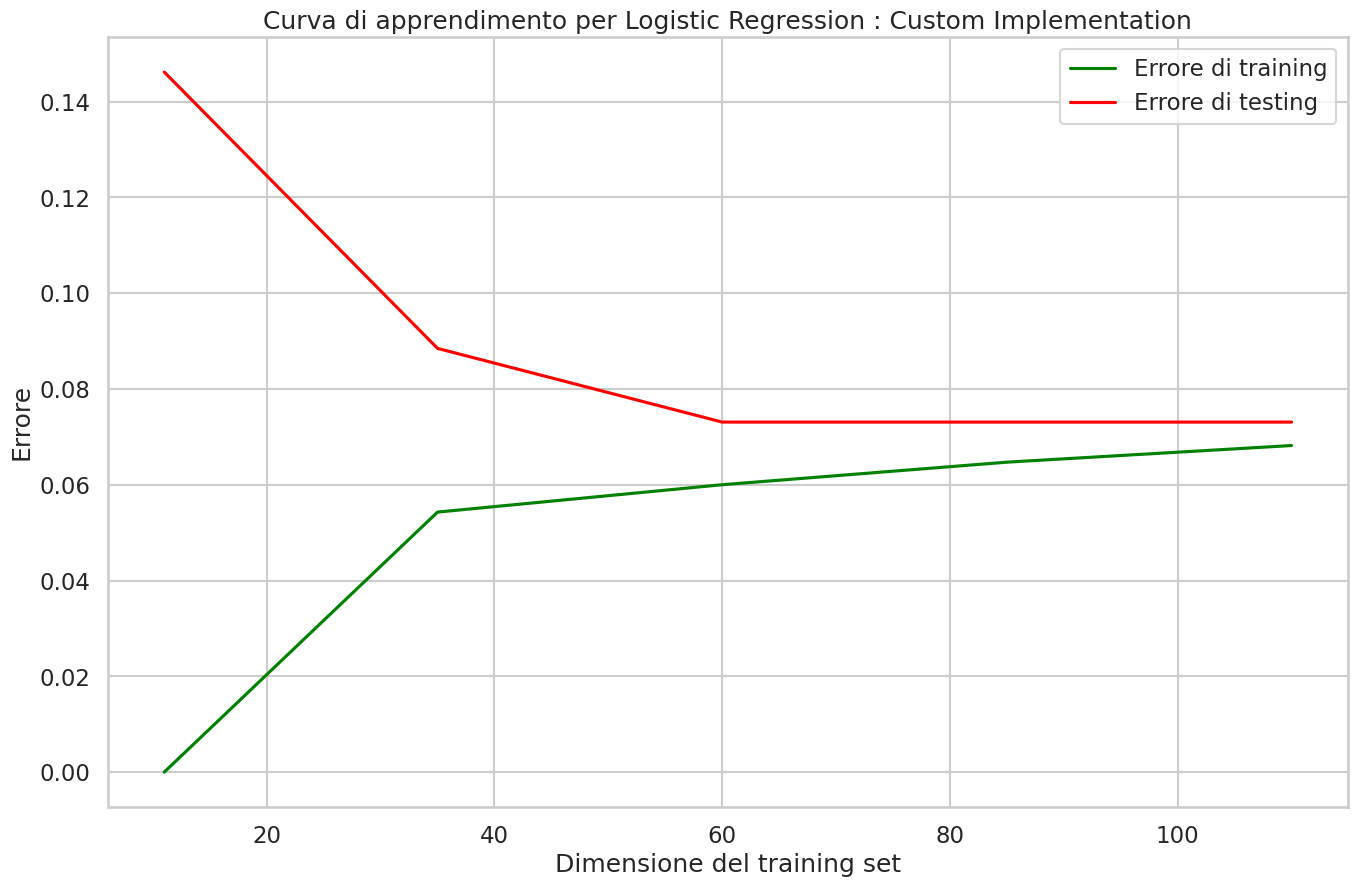

In [29]:
# carica dataset
credit_score = pd.read_csv("/Credit Score Classification Dataset.csv")
print(credit_score.head())

# dividiamo le features di input dalla feature target
X2, y2 = credit_score.iloc[:, :-1], credit_score.iloc[:, -1]

# codifica delle variabili categoriche tramite label encoder
cat_features_list = X2.select_dtypes(include=['object']).columns
X2[cat_features_list] = X2[cat_features_list].apply(LabelEncoder().fit_transform)

# standardizzazione delle features di input
X2_scaled = StandardScaler().fit_transform(X2)

# codifica della variabile target e trasformazione in serie pandas
y2 = pd.Series(LabelEncoder().fit_transform(y2))

# split dataset in training e test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)
X2_train_s, X2_test_s, y2_train, y2_test = train_test_split(X2_scaled, y2, random_state=0)


# addestramento
softmax_regression = SoftmaxRegression()
softmax_regression.fit(X2_train_s, y2_train)

# predizioni
softmax_pred_res = softmax_regression.predict(X2_test_s)

softmax_accuracy = accuracy_score(y2_test, softmax_pred_res)

print(f'\n\nSoftmax-regression accuracy: {softmax_accuracy}')

# print(f'Softmax prediction: {softmax_pred_res}')


from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X, y, differentialColumn, model_name, metodo):
    """Grafico delle curve di apprendimento, training e testing, dei modelli di apprendimento supervisionato"""

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='accuracy')

    # errori di training e testing
    train_errors = 1 - train_scores
    test_errors = 1 - test_scores

    # deviazione standard e la varianza degli errori
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    train_errors_var = np.var(train_errors, axis=1)
    test_errors_var = np.var(test_errors, axis=1)

    print(
        f"\n\n\033[95m{model_name} - Train Error Std: {train_errors_std[-1]}, Test Error Std: {test_errors_std[-1]},\n Train Error Var: {train_errors_var[-1]}, Test Error Var: {test_errors_var[-1]}\033[0m")

    # errori medi su addestramento e test
    mean_train_errors = 1 - np.mean(train_scores, axis=1)
    mean_test_errors = 1 - np.mean(test_scores, axis=1)


    plt.figure(figsize=(16, 10))
    plt.plot(train_sizes, mean_train_errors, label='Errore di training', color='green')
    plt.plot(train_sizes, mean_test_errors, label='Errore di testing', color='red')
    plt.title(f'Curva di apprendimento per {model_name} : {metodo}')
    plt.xlabel('Dimensione del training set')
    plt.ylabel('Errore')
    plt.legend()

    plt.savefig(f'plots\curva_{model_name}_{metodo}.png', dpi=300, bbox_inches='tight')

    plt.show()


plot_learning_curves(softmax_regression,X2_train_s, y2_train, None, "Logistic Regression", "Custom Implementation")

In [33]:
import random


label_encoder = LabelEncoder()
label_encoder.fit(y2)  # Usa i valori originali della variabile target per recuperare le etichette  # TODO : definiscilo prima

# Seleziona un indice casuale dai dati di test
random_index = random.randint(0, len(X2_test_s) - 1)

# Prendi l'esempio corrispondente
sample_x = X2_test_s[random_index].reshape(1, -1)  # Assicurati che abbia la giusta forma
sample_y_true = y2_test.iloc[random_index]  # Valore effettivo

# Fai la predizione con le probabilità
sample_probs = softmax_regression.predict_proba(sample_x)
sample_y_pred = np.argmax(sample_probs)  # Classe predetta

# Ottieni i nomi delle classi
class_labels = label_encoder.inverse_transform(np.arange(len(sample_probs[0])))

# Stampa la distribuzione di probabilità con etichette
print("\nEsempio casuale dai dati di test:")
print(f"Features: {sample_x}")

print(f"\nValore effettivo: {label_encoder.inverse_transform([sample_y_true])[0]}")
print(f"\nValore predetto: {label_encoder.inverse_transform([sample_y_pred])[0]}")

print("\nDistribuzione di probabilità delle classi:")
for label, prob in zip(class_labels, sample_probs[0]):
    print(f"Classe: {label}, Probabilità: {prob:.4f}")



Esempio casuale dai dati di test:
Features: [[ 0.71282713  1.05003052  0.11541915  1.3982379   1.06295349 -0.74086152
  -0.69099745]]

Valore effettivo: 1

Valore predetto: 1

Distribuzione di probabilità delle classi:
Classe: 0, Probabilità: 0.0490
Classe: 1, Probabilità: 0.9034
Classe: 2, Probabilità: 0.0476
